### 파이썬으로 데이터 마이닝 시작하기
## Ch 4 - 분석을 위한 데이터 클리닝과 준비
### Copyright: Nathan Greeneltch, PhD 2019

#### These code examples and description are meant to accompany the book "Python Data Mining Quick Start Guide" by Nathan Greeneltch. For full background on the topics and introduction sections, please purchase the book. 

#### 제4장 학습내용
* 입력 데이터 클리닝
* 결측값(missing value) 처리
* 정규화와 표준화
* 범주형 데이터 처리
* 고차원 데이터와 차원성의 저주
* 필터와 래퍼 기법을 활용한 특징 선택
* 변환이 적용된 특징 선택

## 고차원 데이터(High-dimensional Data)

데이터마이닝에서 일반적으로 분석가는 새로운 특징 열을 분석하는 것에 호의적이다. 추가된 특징이 새로운 정보를 제공하는 것을 기대하기 때문이다. 인간이 지닌 본성에 부합한다고 말할 수 있겠지만, 여기서 조심해야 할 점이 있다. 1950년대에 수학자 리처드 벨만(Richard E. Bellman)에 의해 명명된 '차원성의 저주(the curse of **dimensionality**)'가 바로 그것이다. 이는 특징 공간의 통계적으로 유의미한 표현에서 차원 수가 증가함에 따라 사례(행)의 수는 기하급수적으로 증가한다는 것이다. 차원 수의 증가에 맞춰서 사례의 수를 증가시키지 못하는 것은 데이터가 희박해지게 만들고 실제를 반영하기 어렵게 한다. 흔한 간단한 규칙은 새로운 차원이 추가될 때마다 다섯 개의 사례가 필요하다는 것이다. 내 경험으로는 이 비율을 가능하면 10:1까지 증가시키는 것이 좋다.

## 차원 감소(Dimension Reduction) 

차원성의 저주 때문에 특정 열의 숫자 감소는 작업을 하기 전에 이뤄져야 할 수도 있다. 하지만 차원 수를 줄여야 하는 다른 이유들도 있다. 예를 들어, 데이터를 2차원의 종이 혹은 컴퓨터 스크린을 통해 시각화해야 하는 경우 차원 수를 두 개로 줄여야 한다.
차원을 줄이는 데는 다음과 같은 두 개의 전략이 있다.

* 선택(selection): 가장 좋은 특징을 선택하고 나머지를 제거한다.
* 변환(transformation): 원래 특징들의 결합을 요약하는 새로운 특징을 생성한다.

### 특징 선택(Feature Selection)

특징 선택은 두 가지의 큰 전략으로 이뤄진다.\
첫 번째는 특징 필터링(**feature filtering**)이며, 먼저 중요한 척도를 정의하고 가장 중요한 것만 필터링한다.\
두 번째는 래퍼(**wrapper**) 기법이며, 다운스트림 작업을 흉내 내고 가장 좋은 결과를 선택하기 전에 다양한 조합을 샘플링한다.\
즉, 래퍼 기법은 특정의 부분집합으로 여러 개의 미니 모델을 생성하고 가장 좋은 결과를 보여주는 것을 점수화한다.

#### 특징 필터링(Feature Filtering)

특징 필터링의 핵심은 간단하다. 목표가 중요성을 점수화하는 방법을 찾는 것이라면, 가장 중요한 것만 보유하라. 물론 거기에 상세한 사항이 들어 있고 중요성을 점수화하는 방법은 여러 가지가 있다. 가장 흔한 방법은 분산 한계점(**variance threshold**)을 정의하고 상관계수(**correlation coefficient**)에 의해 정렬하는 것이다

##### 분산 한계점(Variance Threshold)

분산 한계점은 한계점을 설정하고 그 값 아래에 있는 특징들을 제거하는 방법이다. scikit-learn의 **VarianceThreshold** 객체는 적합할 때 각 특징의 분산을 저장하므로, 이를 활용하기 위해 사전 적합을 해보는 것을 추천한다. 사전 적합할 때는 모든 특징이 사전 적합 후에도 남아있게 하기 위해 한계점을 설정하지 않는다.

이를 위한 단계는 다음과 같다.

1. 한계점 없이 사전 적합
2. 분산의 분석
3. 한계점 선택
4. 선택된 한계점을 가지고 재적합

먼저 iris 데이터셋을 로딩하고 선택하기를 원하는 입력 열을 정의한다.

In [4]:
### 참고: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.VarianceThreshold.html

In [5]:
import pandas as pd

In [6]:
# iris 데이터셋을 불러온다
df = pd.read_csv("C:/Users/jy990/anaconda3/DMI/data cleaning/data/iris.csv")
df.index.name = 'record'

df.head()

,sepal length in cm,sepal width in cm,petal length in cm,petal width in cm,species
record,,,,,
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [7]:
# 필터를 적용할 열을 정의한다
cols = ['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm',]

이제 **VarianceThreshold** 객체를 생성하고, 한계점 없이 사전 적합한 후 분석한다.

In [8]:
# 한계점 없이 scikit-learn 객체를 초기화한다
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold()

In [9]:
# df[cols] 사전 적합
selector.fit(df[cols])

VarianceThreshold()

In [10]:
# 선택 이전에 특징 분산을 점검한다
print(selector.variances_)

[0.68112222 0.18675067 3.09242489 0.57853156]


편의상 0.6을 한계치로 선택하고 재적합한다. 결과에서 0부터 2까지의 열이 선택되는 것을 기대할 수 있다.

In [11]:
# 선택 객체의 한계치를 설정한다
selector.set_params(threshold=0.6)

VarianceThreshold(threshold=0.6)

In [12]:
# 재적합 및 변환 후 out_sel에 결과를 저장한다
out_sel = selector.fit_transform(df[cols])

In [13]:
# 선택된 특징을 점검한다. 1번째와 3번째 값만 선택
print(selector.get_support([cols]))

[0 2]


이제 scikit-learn의 **get_support()** 기법을 사용해서 필터링을 적용한다. 

In [14]:
# 선택된 특징 필터를 적용한다
df_sel = df.iloc[:, selector.get_support(cols)]

In [15]:
# 새로운 데이터프레임에 레이블을 추가하고 점검한다. 이렇게 dimension reduction이 된다.
df_sel = pd.concat([df_sel, df[['species']]], axis = 1)
df_sel.head()

,sepal length in cm,petal length in cm,species
record,,,
0,5.1,1.4,setosa
1,4.9,1.4,setosa
2,4.7,1.3,setosa
3,4.6,1.5,setosa
4,5.0,1.4,setosa


##### 상관계수(Correlation Coefficient)

수학에서 상관성은 두 변수 간 일치성의 강도를 나타낸다. **Pearson's r** 상관계수는 가장 흔히 사용되는 상관성 지표다. 1 혹은 -1의 값은 가장 강한 양의 상관관계(**positive correlation**)나 음의 상관관계(**negative correlation**)를 나타낸다. 0에 가까운 값은 두 변수 사이의 상관관계가 낮음을 의미한다. pandas에 내장된 **.corr()** 기법과 seaborn의 **heatmap**을 사용해서 시각적으로 복수의 r 상관계수를 한 번에 분석할 수 있고, 결과에서 가장 높은 상관관계를 갖는 특징을 필터링할 수 있다.

seaborn이 히트맵에서 컬러맵을 사용할 수 있도록 기초적인 시각화 파이썬 라이브러리인 matplotlib 라이브러리를 로딩함으로써 예제를 시작한다. boston 데이터를 다음과 같이 로딩한다.

In [16]:
# 컬러맵을 사용하기 위해 matplotlib을 임포트한다
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [17]:
# california housing dataset을 로딩한다
from sklearn.datasets import fetch_california_housing
dataset = fetch_california_housing(as_frame=True)

In [18]:
print(type(dataset))
print(type(dataset.data))
print(type(dataset.target)) # 이 데이터는 data 부분과 target 부분으로 나뉘어 있다.

<class 'sklearn.utils._bunch.Bunch'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [19]:
dataset.data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [20]:
dataset.target.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [21]:
# pandas의 corr()을 사용하여, 특징들을 대상으로 쌍별 상관계수를 구한다
cor_data = dataset.data.corr()
cor_data

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


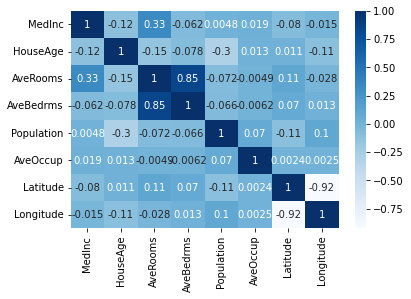

In [22]:
# seaborn의 히트맵을 사용하여 시각화한다
sns.heatmap(cor_data, annot=True, cmap=plt.cm.Blues)
plt.show()

In [23]:
df = pd.concat([dataset.data, dataset.target], axis = 1)
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


이제 pandas의 **.corr()** 기법을 사용해서 모든 변수의 쌍 r 상관계수를 구한다. seaborn **heatmap** 루틴을 사용해서 상관계수를 플롯할 수 있고, 컬러맵을 matplotlib의 Blues로 설정한다.

In [24]:
# pandas의 corr()을 사용하여 상관계수를 구한다
cor = df.corr()
cor

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


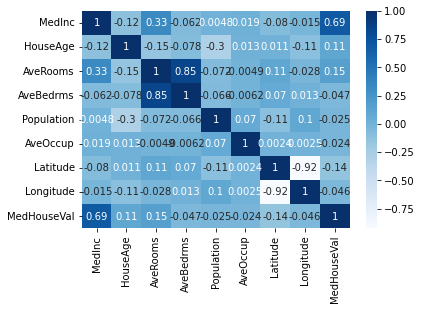

In [25]:
# seaborn의 히트맵을 사용하여 시각화한다. 이번엔 target variable도 포함해서.
sns.heatmap(cor, annot=True, cmap=plt.cm.Blues)
plt.show()

위 다이어그램에서 우변의 스케일은 히트맵을 분석하는데 도움을 준다. 진한 파란색은 더 강한 상관관계를 나타낸다. 여기서, 대각선은 자신과의 쌍이므로 모두 r=1이다. 이 기법을 간단하게 모든 상관관계를 분석하는데 쓸 수 있다. 이 히트맵은 복수의 결과 변수를 한 번에 비교하거나 상관관계가 높은 변수를 찾는 경우에 유용하다. 이 데이터에서 단일 결과 변수('MedHouseVal')만을 사용하므로, 그 결과 변수에 대해 각 입력과 쌍을 이루는 결과의 r 상관계수를 살펴보자.

Medium Income이 가장 큰 상관계수를 갖는다

In [26]:
# 타깃 변수에 대한 상관계수 값을 구한다. 편의상 절댓값 사용
cor_target = abs(cor['MedHouseVal'])
print(cor_target)

MedInc         0.688075
HouseAge       0.105623
AveRooms       0.151948
AveBedrms      0.046701
Population     0.024650
AveOccup       0.023737
Latitude       0.144160
Longitude      0.045967
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64


편의상 0.6을 한계점으로 하고 필터링한다.

In [27]:
# 한계점 0.6 이상의 특징을 선택한다
selected_cols = cor_target[cor_target>0.6]
print("selected columns, correlation with target > 0.6")
print(selected_cols)

selected columns, correlation with target > 0.6
MedInc         0.688075
MedHouseVal    1.000000
Name: MedHouseVal, dtype: float64


In [28]:
# 선택된 특징 필터를 적용한다
df_sel = df[selected_cols.index]
print(df_sel.head())

   MedInc  MedHouseVal
0  8.3252        4.526
1  8.3014        3.585
2  7.2574        3.521
3  5.6431        3.413
4  3.8462        3.422


#### 래퍼 기법(Wrapper Methods)

래퍼 기법은 머신 러닝 예측 알고리즘을 사용해서 좋은 예측을 위한 각 특징의 공헌도를 점수화한다. 순차적 버전(**sequential version**)은 알고리즘 적합의 각 반복에서 특징 리스트를 업데이트한다. 업데이트는 전방(**forward**) 혹은 후방(**backward**) 방향으로 할 수 있다. 즉, 0개의 특징에서 시작해 하나 혹은 그 이상씩 선택하거나, 모든 특징에서 시작해 하나 혹은 그 이상씩 뺄 수 있다.

##### 순차적 특징 선택(Sequential Feature Selection)

순차적 특징 선택은 전방 혹은 후방 방향으로 할 수 있다. 순차적 특징 선택을 위해 전방 순차 선택(**forward sequential selection**) 혹은 후방 순차 선택(**backward sequential selection**) 루틴을 사용한다. 보통 분석가들이 이 용어를 사용할 때는 그들이 점수화 함수를 결정하고 전략을 업데이트하는 루틴을 가리키며(즉, 특징을 더하거나 빼는 것), 그 루틴을 위해 커스텀 코드를 작성한다. 예측 알고리즘의 자동 점수화를 사용할 의향이 있다면, scikit-learn은 내장된 반복적 특징 제거[**recursive feature elimination (RFE)]** 기법을 제공한다.

TIP: scikit-learn의 RFE 기법은 적합 객체에 **.coef_** 혹은 **.feature_importances_** 속성이 있는 어느 예측 알고리즘에서도 작동한다. RFE 기법을 위해 많은 후보 알고리즘이 있지만, 나는 연속 타깃 변수에 대해서는 **LinearRegression()** 을 추천하고 범주형 변수에 대해서는  **RandomForestClassifier()** 를 추천한다. 

이 예제에 대해, 선택하기를 원하는 특징 열을 정의하는 것부터 먼저 시작하자.

In [29]:
# iris 데이터셋을 불러온다
df = pd.read_csv("C:/Users/jy990/anaconda3/DMI/data cleaning/data/iris.csv")
df.index.name = 'record'

# 선택할 열을 지정한다
cols = ['sepal length in cm',
        'sepal width in cm',
        'petal length in cm',
        'petal width in cm',]

서포트 벡터 머신 분류기(SVC)를 예제 RFE에서 추정기로 사용한다. 이제 모듈을 임포트하고 SVC 객체에 대해 독립변수(X)와 종속변수(y)를 정의하자.

In [30]:
# RFE와 분류기 SVC에 대한 모듈을 불러온다
# from library import *
from sklearn.feature_selection import RFE
from sklearn.svm import SVC

# 독립변수를 X로, 종속변수를 y로 지정한다
X = df[cols]
y = df['species']

다음으로, RFE와 SVC 객체를 생성한 뒤 SVC 객체를 RFE의 인수로 전달한다. 결과 특징의 개수(이 경우는 2)를 선택하기 위해 **n_features_to_select** 옵션을 사용한다. 다음으로 적합을 한 뒤 RFE의 **ranking_** 속성을 사용해서 특징 랭킹을 점검한다.

In [31]:
# RFE 객체를 생성하고 각 픽셀의 랭킹을 생성한다
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)

# 랭킹을 출력한다. rank 1이 제일 좋은 것
print(cols)
print(rfe.ranking_)

['sepal length in cm', 'sepal width in cm', 'petal length in cm', 'petal width in cm']
[3 2 1 1]


선택된 속성들은 1의 중요성을 갖는다. **n_features_to_select** = "2"를 RFE 객체의 인수로 전달했기 때문에 이 객체는 두 개의 특징을 선택한다. 이 경우 "petal length"와 "petal width"가 선택됐다.

### 변환(Transformation)

데이터 차원을 감소시키는 흔한 전략 중 하나는 변환이다. 이 전략은 원래 데이터를 새롭게 변환시킬 새로운 차원이나 특징 벡터를 선택한다. 변환은 한 방향에서 더 유용한 방향으로의 데이터 회전으로 생각할 수 있다. 물론, 여기서 중요한 것은 어떻게 새로운 특징 벡터 방향을 선택하느냐이다. 여기에는 두 가지 흔한 수학적 기법이 있고, 둘 다 감독/비감독인 경우에 완전히 확정적이고 타깃된 성질을 갖는다. 감독 버전(**supervised version**)은 데이터에 레이블을 포함하고, 비감독 버전(**unsupervised version**)은 포함하지 않는다. 변환을 설명하고 기법에 대한 이해를 돕기 위해 간단한 예를 들어보자.

**회전 예제**(**Rotation example**): 오버헤드 프로젝터의 앞에서 손을 들고 있으며, 관찰자에게 무엇이 보이는지 질문한다고 하자. 이제 손을 여러 방향으로 회전한다고 생각해보자. 어떤 방향과 위치는 관찰자들에게 더 유용할 것이다. 예를 들어, 손은 큰 사각형 혹은 회전되는 비행기처럼 보일 수도 있고, 혹은 초등학교에서 만들었던 종이 칠면조처럼 보일 수도 있다. 데이터(즉, 여러분의 손)는 바뀌지 않았지만, 데이터를 단지 회전시킴으로써 다운스트림 분석에서의 유용성이 바뀔 수 있는 것이다.

**새로운 특징 벡터 선택**(**New feature vector selection**): 손과 프로젝터의 예를 계속 사용해보자. 

* **비감독**(**Unsupervised**): 레이블이 없으므로, 목표는 가능한 한 많은 정보를 노출시키는 것이다. 여러분의 손을 프로젝터 앞에 정상적으로 위치시키는 것은 그림자의 면적을 최대화할 것이므로, 좋은 선택이 될 수 있다. 데이터마이닝에서는 특징 분산의 형태에서 정보를 최대화하는 방향을 찾는다. 그리고 그 데이터를 고분산(즉, 많은 정보) 공간으로 회전시킨다. Principle Component Analysis (PCA)를 참고하라.
* **감독**(**Supervised**): 레이블이 있고 그 레이블을 유용하게 사용할 수 있다. 엄지손가락을 '0'이라 하고 다른 손가락을 '1'이라 한다고 가정하자. 이제 머릿 속에서 '0' 레이블 주위에 원을 그리고 '1' 레이블 주위에 더 큰 원을 그린다. 각 원의 중심을 표시하고, 손을 두 중심이 최대한 멀어질 때까지 회전시킨다. 두 클래스 레이블(0과 1)을 가장 차별하는 선을 찾을 수 있을 것이다. Linear Discriminant Analysis (LDA)를 참고하라.

#### Principal Component Analysis (PCA)

**PCA**는 비감독 방법으로 데이터의 차원을 감소시키기 위해 사용된다. 이 기법의 목표는 새로운 특징 벡터를 파악하고, 데이터의 분산을 최대화하고(분산이 가장 큰 축을 선택), 원래의 데이터를 새로운 공간에 투사하는 것이다.

분산을 최대화하는 새로운 특징 벡터는 고유벡터(eigenvector)라 불리고, 이것이 데이터의 주성분이 된다. 원래의 특징당 하나의 성분이 있게 된다. 이 기법의 능력은 덜 중요한 성분을 버리고 가장 중요한 성분만 갖고 있음으로써 차원을 감소시킬 때 발휘된다. scikit-learn은 각 주요 성분의 중요성에 대해 순위를 매길 때 사용될 수 있는 **explained_variance_** 속성을 제공한다. 데이터마이닝에서는 주로 새롭게 정의된 낮은 차원을 표시하고 scikit-learn으로 하여금 그 차원을 분산으로 정렬하고 특징들을 제거하기 위해 **n_components** 옵션을 사용하게 될 것이다.

다음의 PCA 예에서 iris 데이터셋의 원래 스캐터 플롯은 왼쪽에 표시되었다. 가장 큰 분산은 적색 화살표의 방향에서 나타나고("PCA1"), 두 번째는 적색 화살표에서 직각 방향인 검은 화살표의 방향에서 나타난다("PCA2"). 이제 데이터를 회전시켜서 두 축이 두 주요 성분이라고 상상해 보자. 마지막으로 축의 방향이 "PCA1"과 "PCA2"인 오른쪽의 스캐터 플롯을 살펴보라.

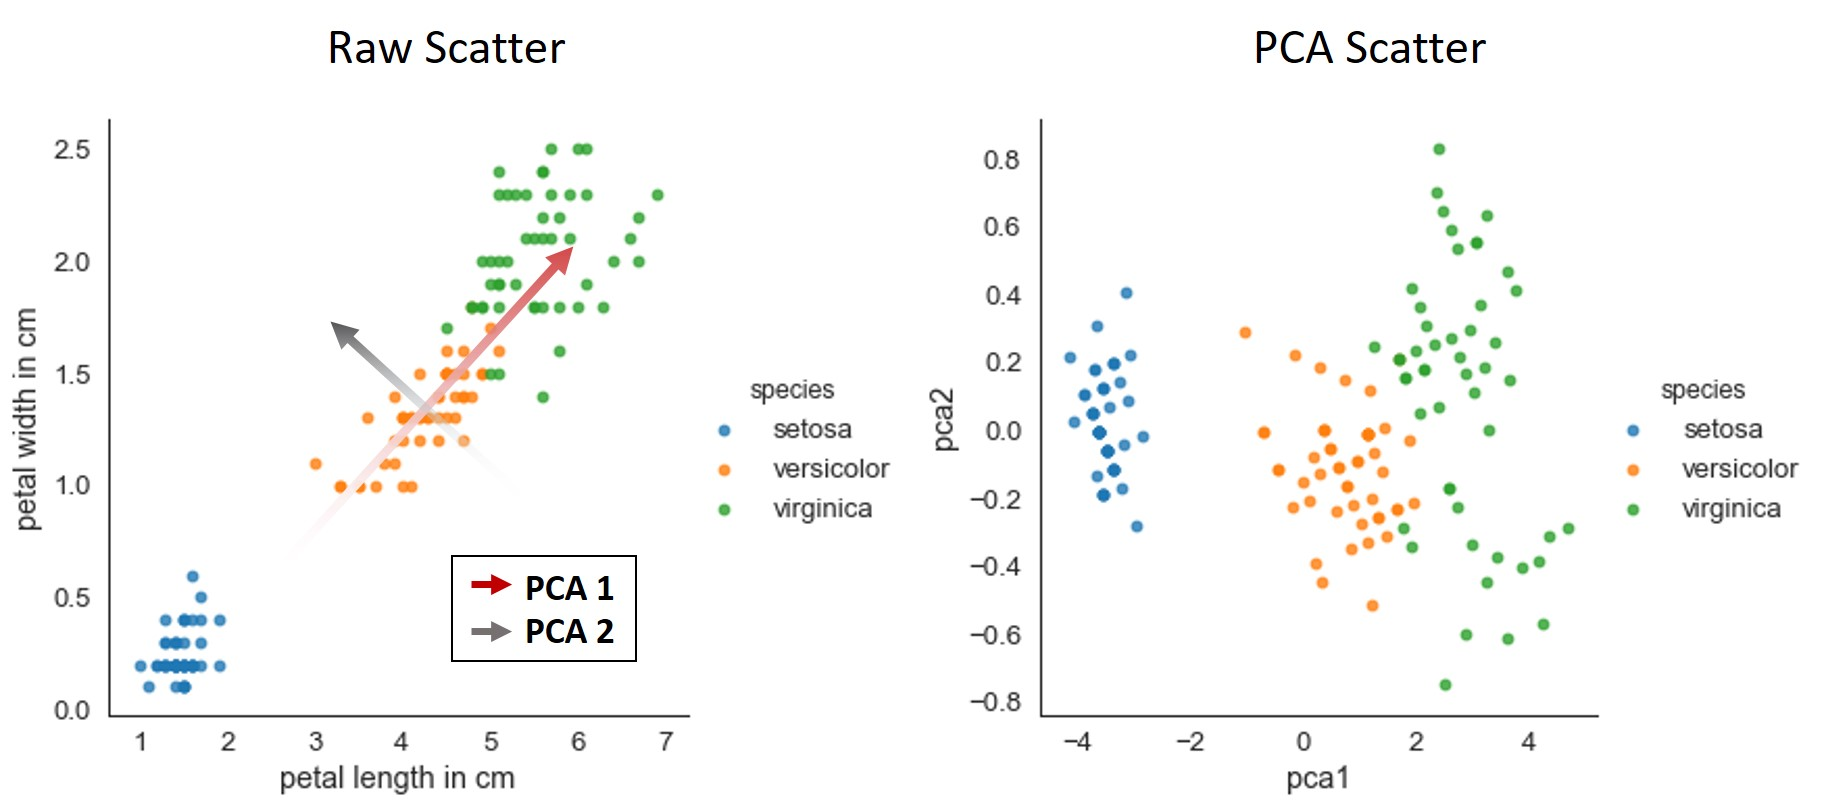

In [32]:
from IPython.display import Image
Image("C:/Users/jy990/anaconda3/DMI/data cleaning/data/iris_scatter_raw_vs_pca.jpg")

이제 scikit-learn PCA 객체와 문법, 그리고 스캐터 플롯을 생성하기 위해 필요한 코드를 살펴보자.

In [33]:
# 두 개의 결과 차원을 갖는 pca 객체를 초기화한다
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

In [34]:
# 두 개의 입력 차원을 사용해서 적합 및 변환한다
out_pca = pca.fit_transform(df[['petal length in cm',
                                'petal width in cm',]])

In [35]:
# pca 결과 데이터프레임을 생성하고 'species' 레이블을 명명한다 
df_pca = pd.DataFrame(data = out_pca, columns = ['pca1', 'pca2'])
df_pca = pd.concat([df_pca, df[['species']]], axis = 1)

In [36]:
df_pca.head()

,pca1,pca2,species
0,-2.561371,-0.004526,setosa
1,-2.561371,-0.004526,setosa
2,-2.653526,0.034301,setosa
3,-2.469217,-0.043353,setosa
4,-2.561371,-0.004526,setosa


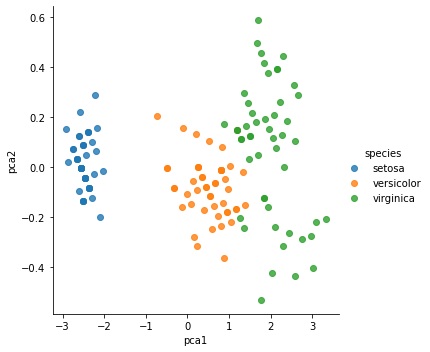

In [37]:
# pca 데이터 스캐터 플롯을 생성한다
sns.lmplot(x='pca1', y='pca2', hue='species', data=df_pca, fit_reg=False)

각 주요 성분에 대한 설명된 분산은 급속히 하락한다. 예를 들어, 50개 혹은 100개의 차원이 있는 데이터에서 보통 두 개 혹은 세 개의 주요 성분만 남기는 것은 흔하다. 그 주요 성분들이 종종 95% 이상의 분산을 설명하기 때문이다. "PCA1"과 "PCA2"의 분산을 보여주기 위해 **explained_variance_ratio**를 다음과 같이 사용할 수 있다.

In [38]:
# 각 원소에 의해 설명되는 분산을 구한다
print(pca.explained_variance_ratio_)

[0.99019934 0.00980066]


두 개의 차원을 갖는 iris 데이터셋에서 첫 번째 주요 성분은 99.02%의 분산을 설명하고, 두 번째 주요 성분은 0.01%만 설명한다. 이는 데이터마이닝에서 필요한 거의 모든 정보는 첫 번째 주요 성분으로부터 구할 수 있다는 것을 의미한다. 이를 각 성분에 대해 바이올린 플롯으로 시각화할 수 있다. 다음 플롯에서 어떤 성분이 가장 유용하고 많은 정보를 주는지 명확히 볼 수 있다.

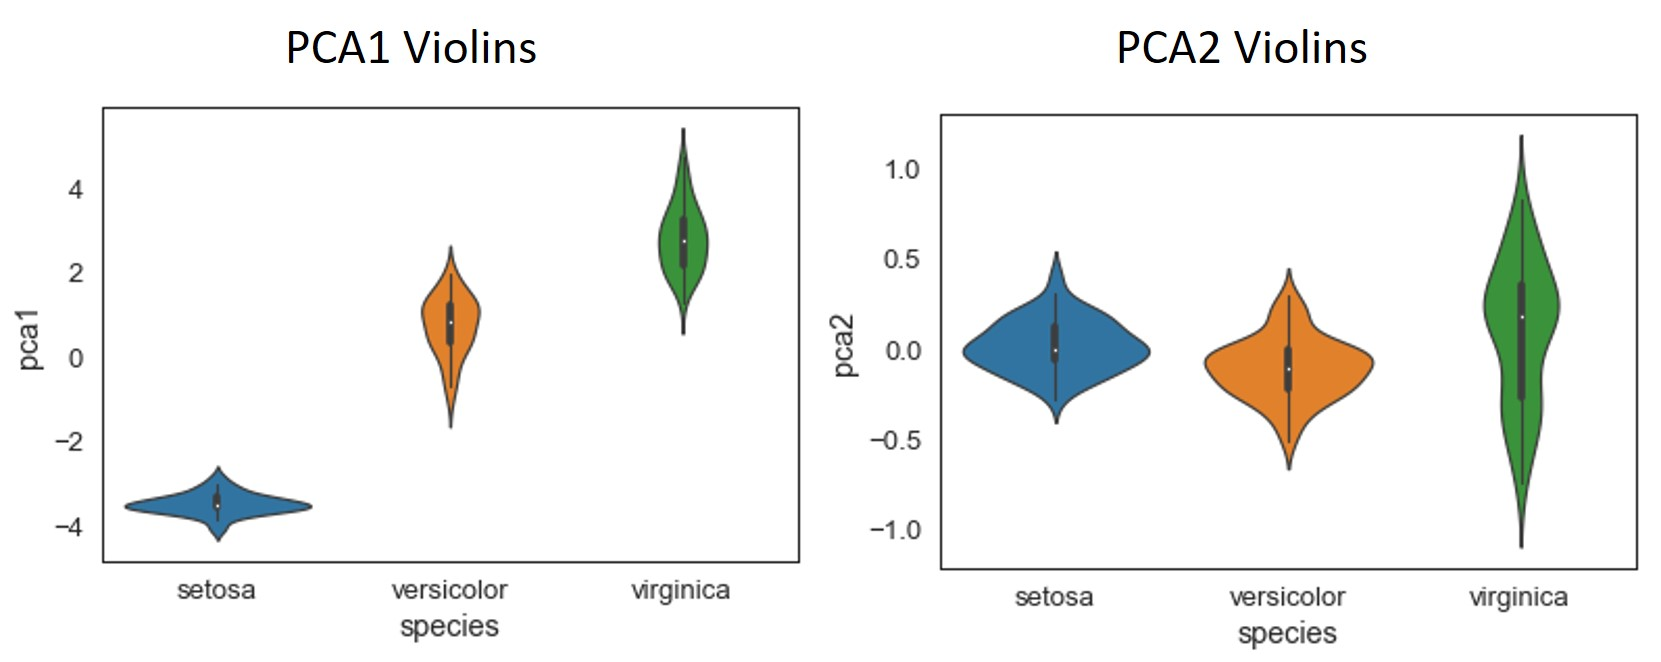

In [39]:
from IPython.display import Image
Image("C:/Users/jy990/anaconda3/DMI/data cleaning/data/iris_violin_pca1-2.jpg")

<AxesSubplot:xlabel='species', ylabel='pca1'>

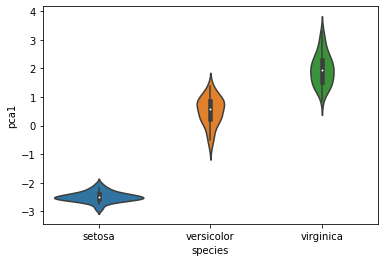

In [40]:
sns.violinplot(x='species',y='pca1', data=df_pca)

<AxesSubplot:xlabel='species', ylabel='pca2'>

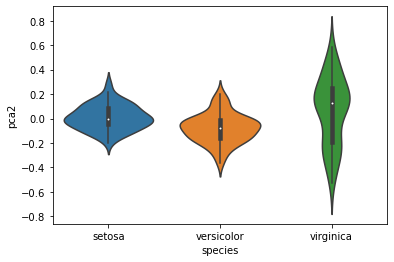

In [41]:
sns.violinplot(x='species',y='pca2', data=df_pca)

#### Linear Discrimant Analysis (LDA)

**LDA**는 감독된 방법으로 데이터의 차원을 줄이는 데 사용된다. 이 기법의 목표는 각 그룹이나 클래스의 평균값을 계산하고 각 클래스의 중심을 최대한 분리하거나 차별하는 새로운 차원을 찾아내는 것이다. 그리고 PCA에서처럼 데이터는 새로운 LDA 차원에 의해 기술된 대로 새로운 공간으로 회전되고 사상된다. 직관적인 이해를 위해 '변환' 절에서 다루었던 예를 참고하라.

PLS(Partial Least Squared) method를 대신 쓸 수도 있다. 차원 축소로 활용할 수도 있고 분류를 위해 활용할 수도 있다.

분리를 최대화하는 새로운 특징 벡터는 판별식(**discriminants**)이라 부른다. 각 벡터는 자신과 자신 외의 모든 다른 벡터를 비교하는 판별식이 있으므로, n개의 벡터가 있는 경우 n-1개의 판별식이 있게 된다.

다음의 LDA 예에서 iris 데이터셋의 원래 스캐터 플롯은 왼쪽에서 볼 수 있다. 여기서, 이전 절에서 다루었던 PCA 예외는 다른 특징을 선택했다는 점에 유의하라. setosa와 나머지 클래스 분리는 적색 화살표("LDA1")의 방향으로 이루어졌고, versicolor-virginica 클래스 분리는 검은 화살표("LDA2")의 방향으로 이루어졌다. 이제 데이터를 회전시켜서 두 축이 두 판별식이 되는 것을 상상해보라. 마지막으로 축이 방향, 즉, "LDA1"과 "LDA2"가 되는 오른쪽 스캐터 플롯을 살펴보라.

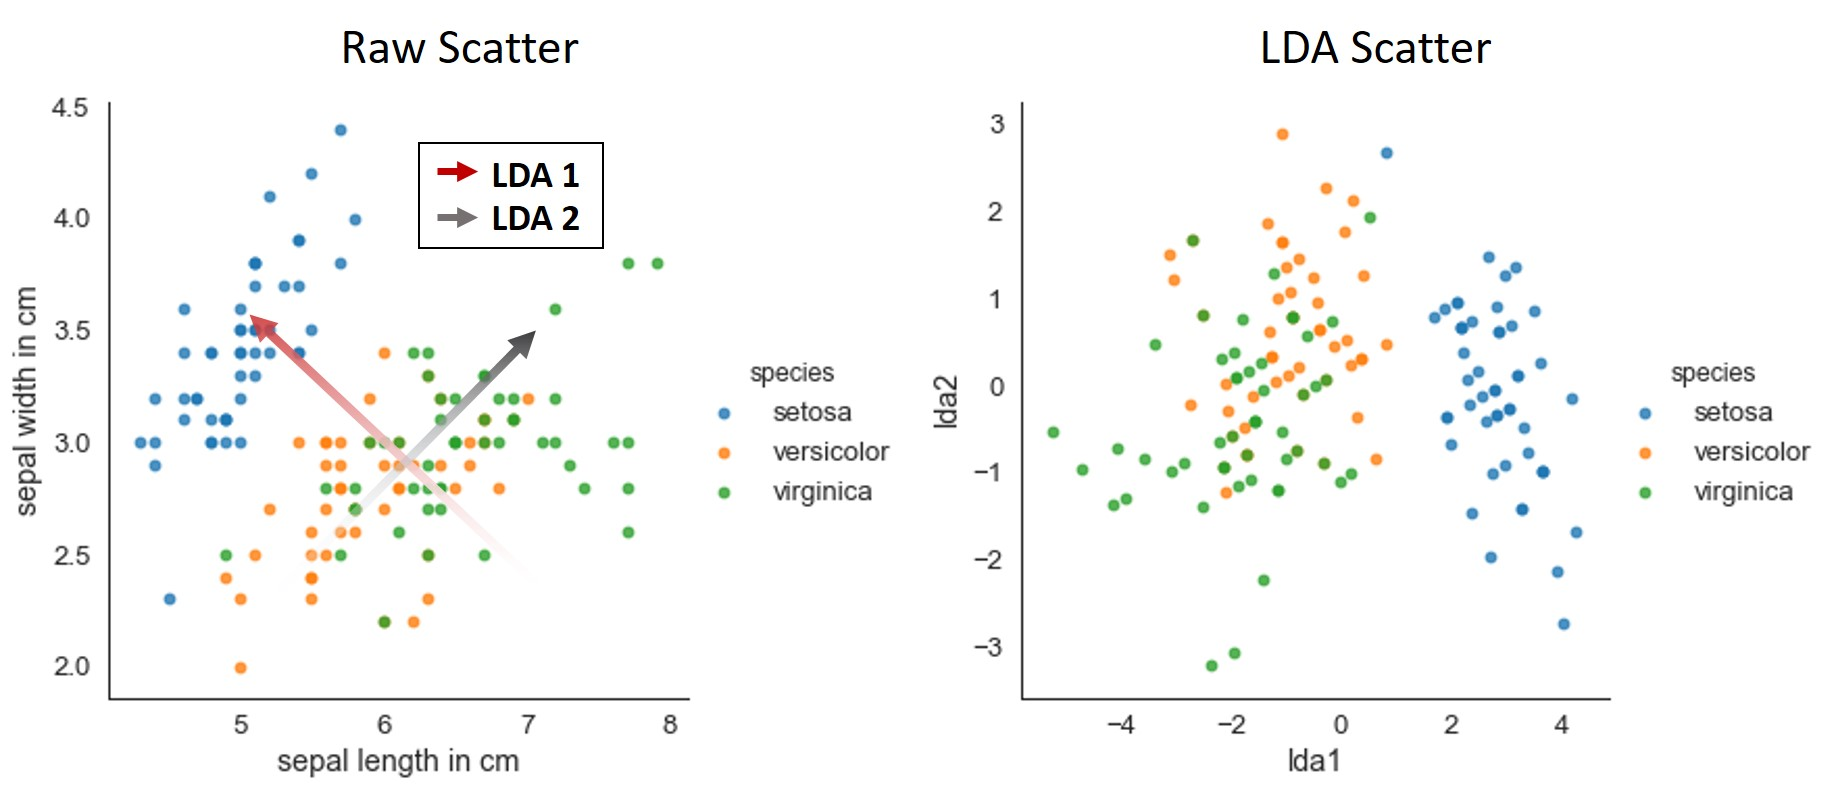

In [42]:
from IPython.display import Image
Image("C:/Users/jy990/anaconda3/DMI/data cleaning/data/iris_scatter_raw_vs_lda.jpg")

이제 scikit-learn LDA 객체, 문법, 그리고 이전의 스캐터 플롯을 생성하는 데 사용됐던 코드를 살펴보자.

In [43]:
# 두 개의 결과 차원을 갖는 lda 객체를 초기화한다
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=2)

In [44]:
# 두 개의 입력 차원을 사용하여 적합 및 변환한다
cols = ['sepal length in cm','sepal width in cm']
lda.fit(df[cols], df['species'])
out_lda = lda.transform(df[cols])

In [45]:
# lda 결과 데이터프레임을 생성하고 레이블 열인 species를 추가한다
df_lda = pd.DataFrame(data = out_lda, columns = ['lda1', 'lda2'])
df_lda = pd.concat([df_lda, df[['species']]], axis = 1)

In [46]:
df_lda.head()

,lda1,lda2,species
0,2.824381,-0.343356,setosa
1,1.877312,0.870748,setosa
2,2.857492,0.609787,setosa
3,2.796939,0.900753,setosa
4,3.314471,-0.473837,setosa


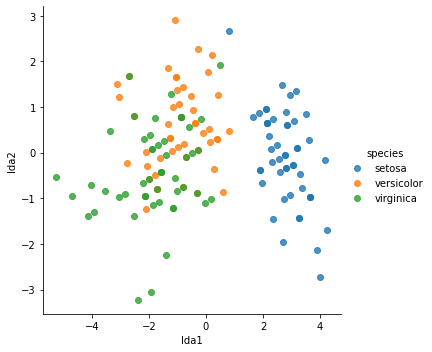

In [47]:
sns.lmplot(x="lda1", y="lda2", hue="species", data=df_lda, fit_reg=False)